In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

#### **Classe Rede**

In [61]:
geracao = np.random.rand(2,180)
geracao = np.round(geracao,2)
geracao

array([[0.12, 0.73, 0.48, 0.96, 0.69, 0.45, 0.11, 0.35, 0.06, 0.76, 0.28,
        0.35, 0.67, 0.71, 0.15, 0.23, 0.31, 0.76, 0.02, 0.03, 0.1 , 0.81,
        0.91, 0.72, 0.07, 0.39, 0.74, 0.69, 0.75, 0.33, 0.77, 0.98, 0.67,
        0.94, 0.08, 0.4 , 0.92, 0.52, 0.94, 0.43, 0.91, 0.14, 0.74, 0.85,
        0.52, 0.32, 0.14, 0.46, 0.62, 0.84, 0.22, 0.93, 0.04, 0.3 , 0.97,
        0.13, 0.11, 0.51, 0.77, 0.69, 0.48, 0.51, 0.45, 0.55, 0.94, 0.16,
        0.74, 0.97, 0.12, 0.56, 0.65, 0.5 , 0.11, 0.73, 0.25, 0.94, 0.86,
        0.29, 0.23, 0.57, 0.73, 0.91, 0.83, 0.26, 0.3 , 0.44, 0.54, 0.63,
        0.08, 0.24, 0.66, 0.42, 0.92, 0.11, 0.02, 0.61, 0.67, 0.68, 0.48,
        0.65, 0.11, 0.35, 0.45, 0.84, 0.05, 0.52, 0.57, 0.72, 0.16, 0.46,
        0.08, 0.4 , 0.94, 0.62, 0.85, 0.15, 0.83, 0.66, 0.37, 0.58, 0.45,
        0.77, 0.25, 0.8 , 0.64, 0.73, 0.85, 0.61, 0.53, 0.4 , 0.96, 0.78,
        0.52, 0.59, 0.88, 0.36, 0.72, 0.7 , 0.48, 0.26, 0.97, 0.79, 0.18,
        0.94, 0.65, 0.24, 0.47, 0.5 , 

In [ ]:
class Rede:
    def __init__(self):
        self.oculta = [None]*9
        self.saida = [None]*9
        # self.pesos = np.random.rand(2,180)

#### **Clase Neurônio**

In [31]:
class Neuronio:
    def __init__(self,array_jogada,array_pesos: None):
        self.jogada = array_jogada
        self.pesos = array_pesos
        
        
    def heuristica(self,soma):
        return 1 / (1 + soma)
    
    def propagation(self,array_pesos):
        for i in self.jogada:
            soma += self.jogada[i] * array_pesos[i]
        

In [64]:
array_pesos = []
for linha in geracao:
    for i in range(0,len(linha),10):
        array_pesos.append(linha[i: i + 10])
        
print(array_pesos[0])

[0.12 0.73 0.48 0.96 0.69 0.45 0.11 0.35 0.06 0.76]


In [75]:
def heuristica(soma):
        return round(1 / (1 + soma),2)

# Exemplo jogada
jogada = [1,0,0,0,-1,0,0,0,0]
print("Joagada inicial:",jogada)

# Incluindo um valor 1 no inicío do array da jogada por causa do peso bias
jogada.insert(0,1)
print("Joagada ajustada:",jogada)


# Exemplo pesos
pesos = array_pesos[10]
print("Vetor de pesos:",pesos)

# Lista para receber os valores de y
lista_valores = []

soma = 0



count = 0
while count < 9:
    pesos = array_pesos[count]
    for i in range(len(jogada)):
        # print("jogada: {}* peso:{}".format(jogada[i],pesos[i]))
        soma += (jogada[i] * pesos[i])

    y = heuristica(soma)
    print("Y{} = {}".format(count+1,y))
    lista_valores.append(y)
    count += 1

# y = heuristica(soma)
# print("Y = {}".format(y))

# lista_valores.append(y)


print("Cromossomos",lista_valores)
# print(len(lista_valores))

Joagada inicial: [1, 0, 0, 0, -1, 0, 0, 0, 0]
Joagada ajustada: [1, 1, 0, 0, 0, -1, 0, 0, 0, 0]
Vetor de pesos: [0.11 0.35 0.45 0.84 0.05 0.52 0.57 0.72 0.16 0.46]
Y1 = 0.71
Y2 = 0.56
Y3 = 0.43
Y4 = 0.27
Y5 = 0.23
Y6 = 0.18
Y7 = 0.16
Y8 = 0.15
Y9 = 0.13
Cromossomos [0.71, 0.56, 0.43, 0.27, 0.23, 0.18, 0.16, 0.15, 0.13]


#### **Funções para classificação de jogadas**

In [ ]:
# Função para verificar se as linhas são iguais
def verif_linhas(tabuleiro):
    for i in range(0, 9, 3):
        # Verificando se todos os elementos da linha são iguais exceto zero
        if tabuleiro[i] == tabuleiro[i+1] == tabuleiro[i+2] != 0:
            return str(tabuleiro[i])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se as colunas são iguais
def verif_colunas(tabuleiro):
    for i in range(3):
        # Verificando se todos os elementos da coluna são iguais exceto zero
        if tabuleiro[i] == tabuleiro[i+3] == tabuleiro[i+6] != 0:
            return str(tabuleiro[i])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se a diagonal principal é igual
def verif_diag_principal(tabuleiro):
    # Verificando se todos os elementos da diagonal principal são iguais exceto zero
    if tabuleiro[0] == tabuleiro[4] == tabuleiro[8] != 0:
        return str(tabuleiro[0])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se a diagonal secundária é igual
def verif_diag_secundaria(tabuleiro):
    # Verificando se todos os elementos da diagonal secundária são iguais exceto zero
    if tabuleiro[2] == tabuleiro[4] == tabuleiro[6] != 0:
        return str(tabuleiro[2])  # Retornando o valor do ganhador: 1 ou -1
    return False

def get_vencedor(lista_respostas):
    for valor in lista_respostas:
        # Transormando cada valor em uma string, verifica-se se o valor é numérico (1 ou -1)
        valor = str(valor)
        # if valor.isnumeric():
        #     # Condicional para determinar qual valor retorna
        if valor == "1":
            return "X"
        elif valor == "-1":
            return "O"

def status_jogo(jogada):
    
    # Criando uma lista com os retornos das funções verificadoras de cada jogada, o resultado é um array de 4 elementos. Ex: [1,False,False,False]
    lista_resposta = list([verif_colunas(jogada), verif_linhas(jogada), verif_diag_principal(jogada), verif_diag_secundaria(jogada)])
    # Se algum dos elementos da lista for diferente de false, a função get_vencedor será chamada
    if any(lista_resposta):
        valor = get_vencedor(lista_resposta)
        return valor + " VENCEU!"
    # Condicional para verificar se os únicos valores preenchidos no tabuleiro são 1 e -1
    elif len(np.unique(jogada)) == 2 and 0 not in np.unique(jogada):
        return "EMPATE"
    else:
        return "AINDA TEM JOGO"

#### **Minimax**

In [4]:
import numpy as np
import math

# Define os jogadores
USER = 1    # Jogador (usuário) representado como 1
AI = -1     # Computador representado como -1

class Node:
    def __init__(self, board, player, move=None):
        self.board = board.copy()
        self.player = player
        self.move = move  # A jogada (linha, coluna) que levou a este estado
        self.children = []
        self.score = None

    # Método para expandir o nó, gerando todos os possíveis movimentos
    def expand(self):
        for i in range(3):
            for j in range(3):
                if self.board[i, j] == 0:
                    new_board = self.board.copy()
                    new_board[i, j] = self.player
                    child_node = Node(new_board, -self.player, (i, j))
                    self.children.append(child_node)
                    child_node.expand()

# Função MiniMax usando árvore de estados
def minimax(node, depth, is_maximizing):
    winner = status_jogo(jogada)
    if winner == "O VENCEU!":
        return -10 + depth
    elif winner == "X VENCEU!":
        return 10 - depth
    elif "EMPATE":
        return 0

    # Se não for folha, calcula os scores dos filhos
    if is_maximizing:
        best_score = -math.inf
        for child in node.children:
            score = minimax(child, depth + 1, False)
            best_score = max(score, best_score)
        node.score = best_score
        return best_score
    else:
        best_score = math.inf
        for child in node.children:
            score = minimax(child, depth + 1, True)
            best_score = min(score, best_score)
        node.score = best_score
        return best_score

# Função para encontrar a melhor jogada
def find_best_move(board):
    root = Node(board, AI)  # Cria o nó raiz com a jogada da IA
    root.expand()  # Expande a árvore a partir da raiz

    best_score = math.inf
    best_move = None
    for child in root.children:
        score = minimax(child, 0, True)  # Maximiza a jogada do usuário
        if score < best_score:
            best_score = score
            best_move = child.move

    return best_move

#### **Funções para realização de jogadas**

In [ ]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada, linha, coluna):
    # Cálculo do índice no array 1x9 a partir da linha e coluna
    indice = (linha - 1) * 3 + (coluna - 1)

    print("Linha:", linha)
    print("Coluna:", coluna)

    # Verificar se o valor na posição especificada é igual a zero
    if jogada[indice] == 0:
        return True
    
    return False
    
# Função para realização da jogada do computador a partir de uma jogada aleatória
def jogada_Aleatoria(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índice aleatório de 0 a 8 na lista 1x9
        indice = random.randint(0, 8)

        # Caso a posição escolhida esteja livre, realiza a modificação
        if jogada[indice] == 0:
            # Atribuição realizada na posição aleatória escolhida
            jogada[indice] = -1
            jogada_feita = True
        
    return jogada

# Função para utilização do Minimax para realização da jogada
def jogada_Minimax(jogada):
    # Usando Minimax para obter a melhor posição para realização da jogada
    posicao = find_best_move(jogada)
    
    # Realização da jogada no tabuleiro
    jogada[posicao] = -1
    
    return jogada


# Função para ajuste de jogadas
def ajuste_jogada(jogada, linha, coluna):
    # Cálculo do índice no array 1x9 a partir de linha e coluna
    indice = (linha - 1) * 3 + (coluna - 1)

    # Substituindo o valor da posição informada por 1
    jogada[indice] = 1

    return jogada

# Função para definir a dificuldade da partida
def set_dificuldade():
    valor_valido = False
    while not valor_valido: 
        dificuldade = input("Escolha o nível de dificuldade: [1]: FÁCIL\n[2]: MÉDIO\n[3]: DIFÍCIL")
        
        if not dificuldade.isnumeric():
            print("Valor precisa ser numérico!")
            continue
        
        if int(dificuldade) not in range(1,4):
            print("O valor deve ser 1, 2 ou 3")
            continue
        
        valor_valido = True
        break
        
    return int(dificuldade)

# Função para definir o acesso ao minimax 
def jogada_COM(jogada,dificuldade):
    ###
    # Dificuldade do jogo 
    # [1]: FÁCIL
    # [2]: MÉDIO
    # [3]: DIFÍCIL
    # 
    
    # Caso seja fácil, se o valor aleatório for menor que 25% acessa o minimax
    if dificuldade == 1:
        if random.random() < 0.25:
            jogada = jogada_Minimax(jogada)
            
        jogada = jogada_Aleatoria(jogada)
    
    # Caso seja médio, se o valor aleatório for menor que 50% acessa o minimax
    elif dificuldade == 2:
        if random.random() < 0.5:
            jogada = jogada_Minimax(jogada)
            
        jogada = jogada_Aleatoria(jogada)
    
    # Caso seja difícil, sempre acessa o minimax
    elif dificuldade == 3:
        jogada = jogada_Minimax(jogada)
        
    return jogada


### **Função para plotagem do tabuleiro**

In [6]:
import matplotlib.pyplot as plt

def plot_board(board,status=None):

    board = np.array(board).reshape(3, 3)

    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if status is not None:
        plt.text(1.5, -0.5, 'Status: ' + status, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


In [28]:
# jogada = [1,-1,0,0,1,0,0,-1,1]

# # status_jogo(jogada)
# jogada_realizada = False
# while not jogada_realizada:
#     linha,coluna = coleta_jogada()
    
#     # Chamando a função de validação de jogada
#     if valida_jogada(jogada,linha,coluna):
#         # Realizando o ajuste da jogada a partir das posições de inserção informadas
#         jogada = ajuste_jogada(jogada,linha,coluna)
#         print('Jogada realizada!')
#         jogada_realizada = True
#     else:
#         print("Jogada não realizada")
#         continue # Recomeça solicitando a jogada para o usuário

### **Realização da partida**

Linha: 1
Linha: 3
Jogada realizada!


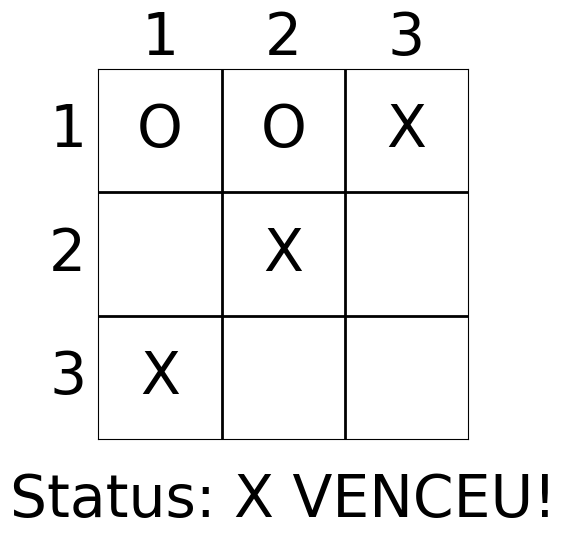

In [ ]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
plot_board(jogada)

finalizar_jogo = False

dificuldade = set_dificuldade()

while not finalizar_jogo:
    clear_output(wait=True)
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Posição já ocupada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada do usuário
    status  = status_jogo(jogada)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True
        plot_board(jogada,status)
        break
    
    jogada = jogada.reshape(3,3)

    # Realização de jogada da máquina
    jogada = jogada_COM(jogada,dificuldade)

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada da máquina
    status  = status_jogo(jogada)

    # Plotando o tabuleiro 
    plot_board(jogada,status)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True